In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


In [2]:
df_day=pd.read_csv('day.csv')

Preprocessing

In [3]:
print("Shape of the dataset:",df_day.shape)
#Prints the number of rows and columns

Shape of the dataset: (731, 16)


In [4]:
#It tells the null values
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [5]:
#To understand the data[it is the part of EDA]
print(df_day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [6]:
#our dataset has no null values but also we need to confirm
print(df_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


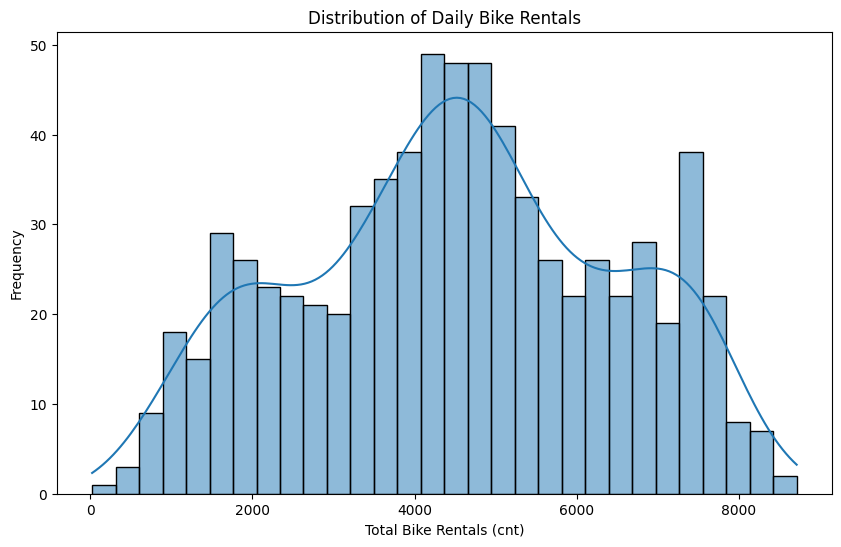

In [7]:
# Visualize the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title("Distribution of Daily Bike Rentals")
plt.xlabel("Total Bike Rentals (cnt)")
plt.ylabel("Frequency")
plt.show()


In [8]:
print(f"Skewness of the 'cnt' column: {df_day['cnt'].skew()}")
print("-" * 30)

Skewness of the 'cnt' column: -0.04735278011900183
------------------------------


In [9]:
# Convert 'dteday' to datetime objects for proper plotting
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

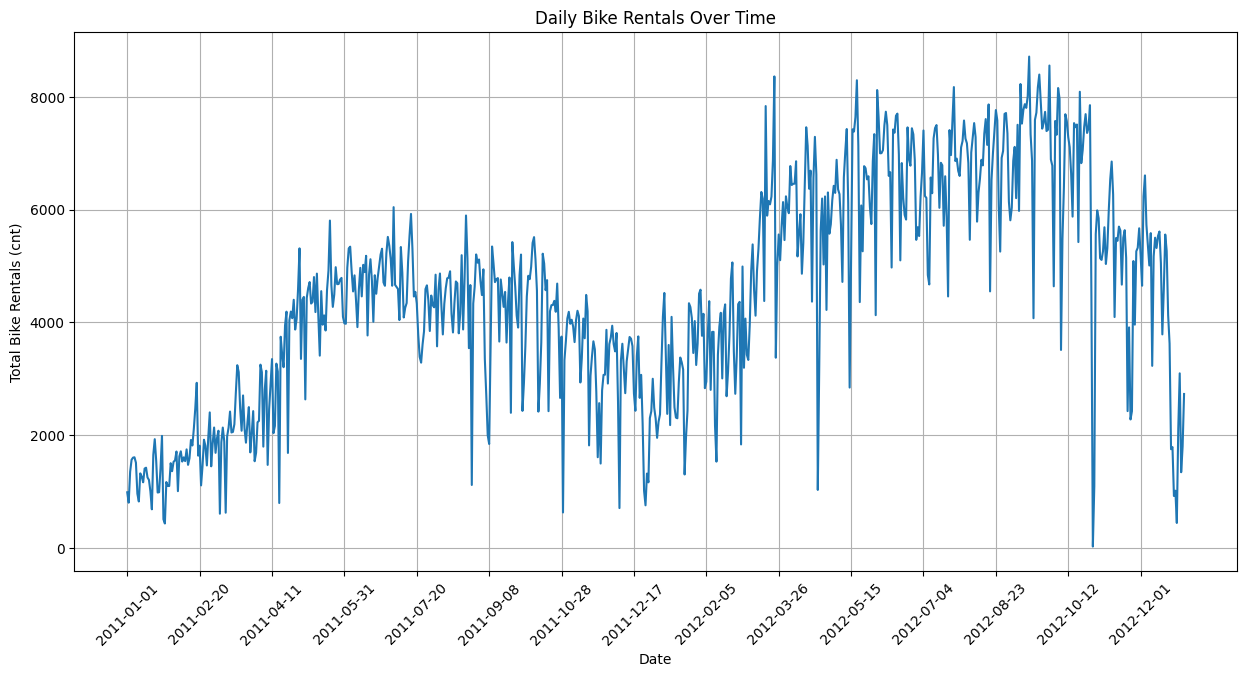

In [10]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="dteday", y="cnt", data=df_day)
plt.title("Daily Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Bike Rentals (cnt)")
plt.xticks(df_day['dteday'][::50], rotation=45)
plt.grid(True)
plt.show()

In [11]:
# --- EDA: Categorical Feature Analysis ---

# Visualize the relationship between categorical features and 'cnt'
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

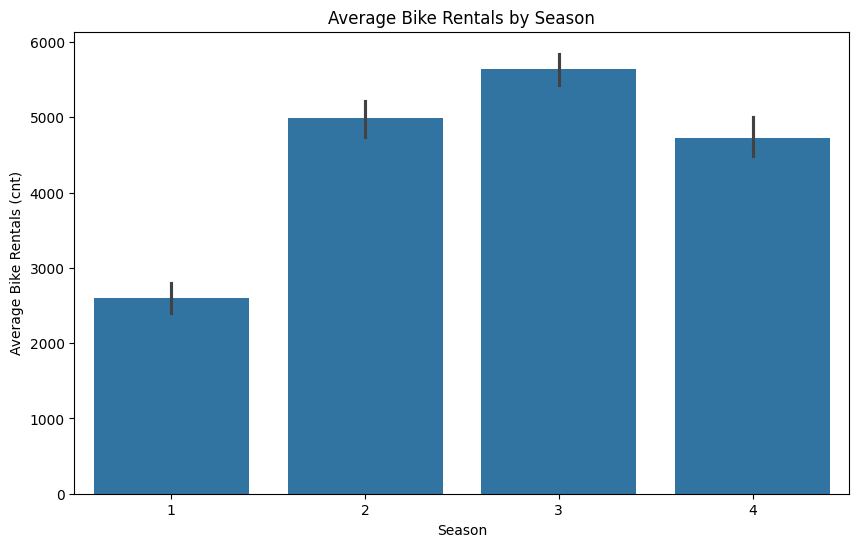

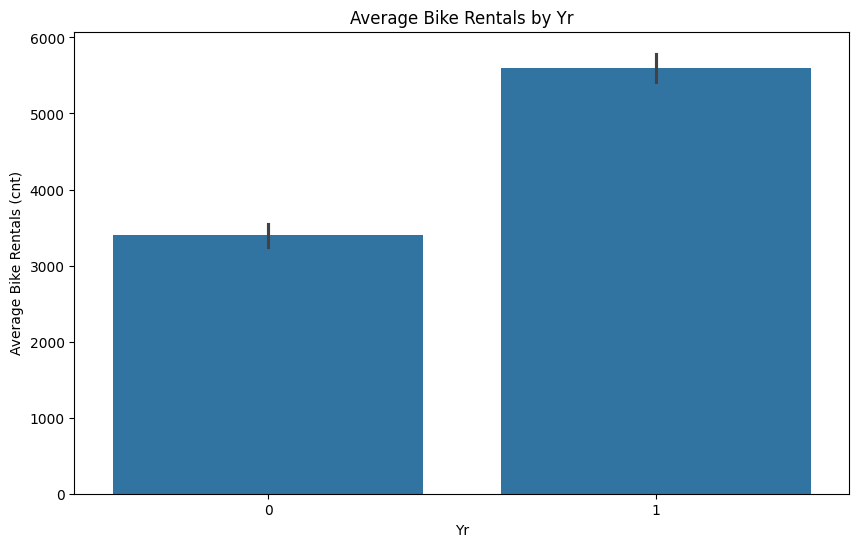

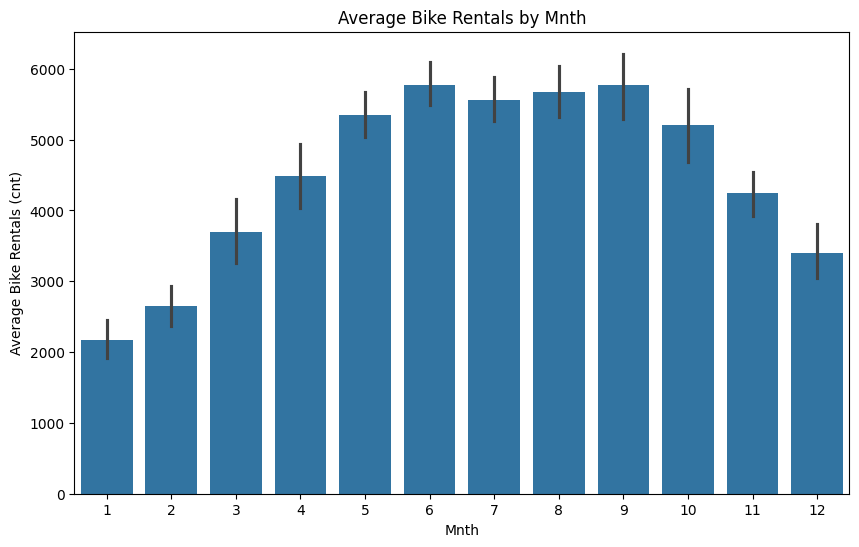

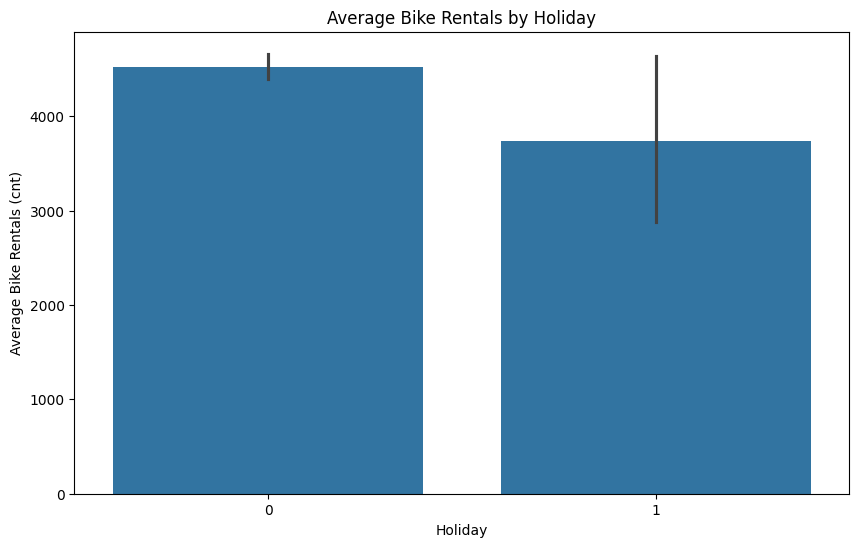

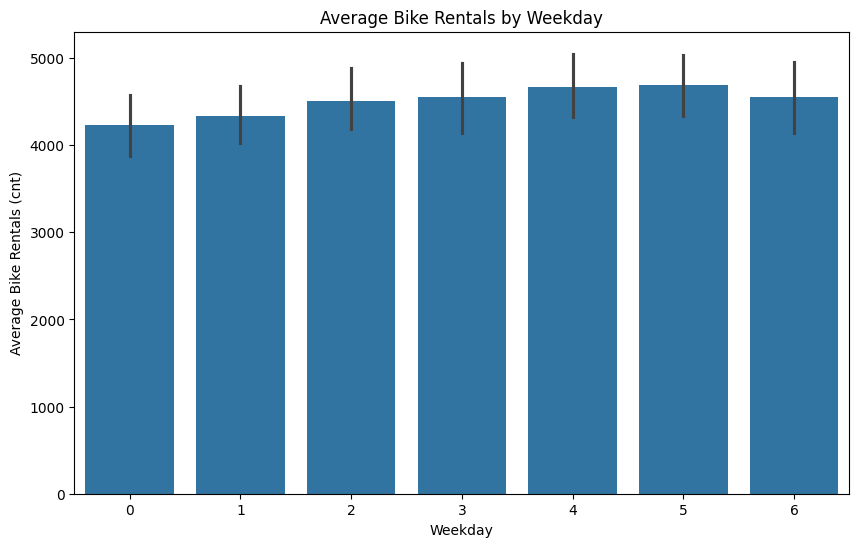

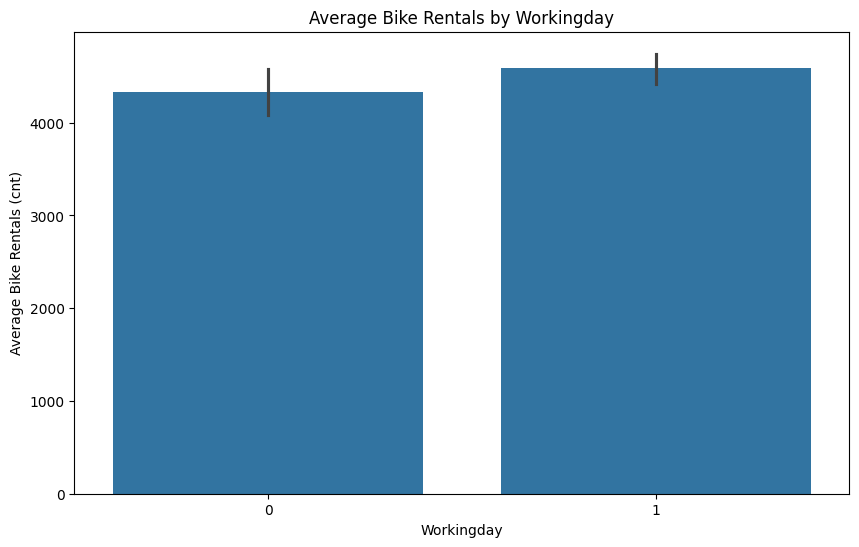

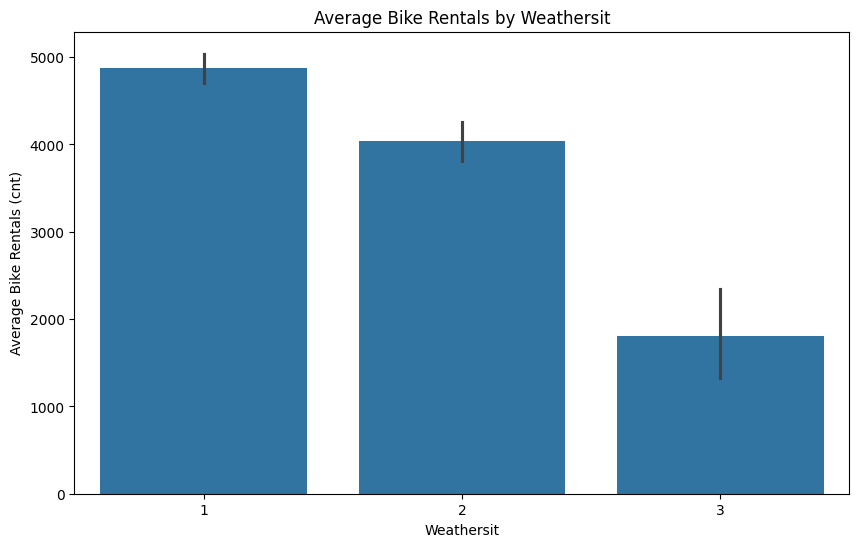

In [14]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='cnt', data=df_day)
    plt.title(f"Average Bike Rentals by {feature.capitalize()}")
    plt.xlabel(f"{feature.capitalize()}")
    plt.ylabel("Average Bike Rentals (cnt)")
    plt.show()

In [15]:
# ----Multicollinearity Check ---

# Drop 'instant', 'dteday', 'casual', and 'registered' for correlation analysis
features_for_corr = df_day.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis=1)

In [16]:
# Calculate the correlation matrix
correlation_matrix = features_for_corr.corr()

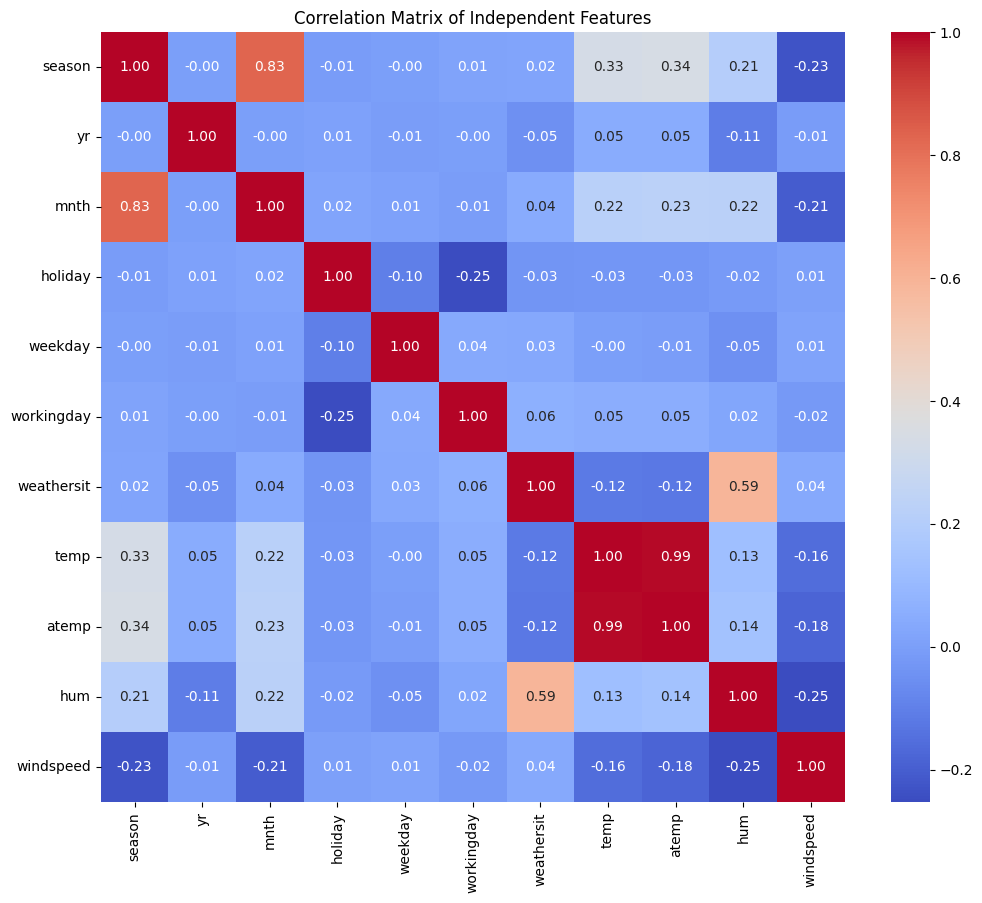

In [17]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Independent Features")
plt.show()

In [18]:
# Print correlations of features with the target variable 'cnt'
# Add the target variable back for this specific check
correlation_with_target = df_day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1).corr()
print("Correlation of features with 'cnt':")
print(correlation_with_target['cnt'].sort_values(ascending=False))
print("-" * 30)

Correlation of features with 'cnt':
cnt           1.000000
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64
------------------------------


In [19]:
# --- Feature Engineering ---

# You have already converted 'dteday' to a datetime object in the line plot section.
# Now, you can extract new features from it to potentially improve your model.
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month
df_day['day_of_week'] = df_day['dteday'].dt.dayofweek
df_day['day_of_year'] = df_day['dteday'].dt.dayofyear


In [20]:
print("\nDataFrame with new engineered features:")
print(df_day.head())


DataFrame with new engineered features:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  year  month  day_of_week  day_of_year  
0 

In [21]:
X = df_day.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis=1)
y = df_day['cnt']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("Shape of training data (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of testing data (X_test, y_test):", X_test.shape, y_test.shape)
print("-" * 30)


Shape of training data (X_train, y_train): (584, 15) (584,)
Shape of testing data (X_test, y_test): (147, 15) (147,)
------------------------------


LINEAR REGRESSION


In [24]:
# Model 1: Linear Regression (simple baseline model)
print("Training Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

def calculate_smape(y_true, y_pred):
    return 100 * np.mean(
        np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
    )
lr_smape=calculate_smape(y_test, lr_pred)


print(f"Linear Regression MAE: {lr_mae:.2f}")
print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression R-squared: {lr_r2:.2f}")
print(f"Linear Regression SMAPE: {lr_smape:.2f}%")
print("-" * 30)

Training Linear Regression Model...
Linear Regression MAE: 615.42
Linear Regression RMSE: 825.41
Linear Regression R-squared: 0.83
Linear Regression SMAPE: 17.63%
------------------------------


RANDOM FOREST REGRESSION

In [25]:
# Model 2: Random Forest Regressor
print("Training and Evaluating Random Forest Regressor Model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and calculate accuracy metrics
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)
rf_smape = calculate_smape(y_test, rf_pred)

print(f"Random Forest Regressor MAE: {rf_mae:.2f}")
print(f"Random Forest Regressor RMSE: {rf_rmse:.2f}")
print(f"Random Forest Regressor R-squared: {rf_r2:.2f}")
print(f"Random Forest Regressor SMAPE: {rf_smape:.2f}%")
print("-" * 30)

Training and Evaluating Random Forest Regressor Model...
Random Forest Regressor MAE: 417.17
Random Forest Regressor RMSE: 664.90
Random Forest Regressor R-squared: 0.89
Random Forest Regressor SMAPE: 12.57%
------------------------------


In [26]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [27]:
# Import libraries for data handling, model building, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Import the new models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

XGBOOST REGRESSION


In [28]:
print("Training and Evaluating XGBoost Regressor Model...")
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Calculate metrics for XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_smape=calculate_smape(y_test, xgb_pred)


print(f"--- XGBoost Regressor Metrics ---")
print(f"MAE: {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R-squared: {xgb_r2:.2f}")
print(f"SMAPE: {xgb_smape:.2f}%")
print("-" * 30)

Training and Evaluating XGBoost Regressor Model...
--- XGBoost Regressor Metrics ---
MAE: 415.06
RMSE: 630.57
R-squared: 0.90
SMAPE: 12.77%
------------------------------


LightGBM REGRESSION

In [29]:
print("\nTraining and Evaluating LightGBM Regressor Model...")
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate metrics for LightGBM
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
lgbm_r2 = r2_score(y_test, lgbm_pred)
lgbm_smape = calculate_smape(y_test, lgbm_pred)

print(f"--- LightGBM Regressor Metrics ---")
print(f"MAE: {lgbm_mae:.2f}")
print(f"RMSE: {lgbm_rmse:.2f}")
print(f"R-squared: {lgbm_r2:.2f}")
print(f"SMAPE: {lgbm_smape:.2f}%")
print("-" * 30)


Training and Evaluating LightGBM Regressor Model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 14
[LightGBM] [Info] Start training from score 4560.977740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

CATBOOST REGRESSION

In [30]:
print("\nTraining and Evaluating CatBoost Regressor Model...")
cat_model = CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

# Calculate metrics for CatBoost
cat_mae = mean_absolute_error(y_test, cat_pred)
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_pred))
cat_r2 = r2_score(y_test, cat_pred)
cat_smape=calculate_smape(y_test, cat_pred)

print(f"--- CatBoost Regressor Metrics ---")
print(f"MAE: {cat_mae:.2f}")
print(f"RMSE: {cat_rmse:.2f}")
print(f"R-squared: {cat_r2:.2f}")
print(f"SMAPE: {cat_smape:.2f}%")
print("-" * 30)


Training and Evaluating CatBoost Regressor Model...
--- CatBoost Regressor Metrics ---
MAE: 406.55
RMSE: 633.99
R-squared: 0.90
SMAPE: 12.62%
------------------------------


FINE TUNING FOR RANDOM FOREST REGRESSION

In [31]:
# --- Hyperparameter Tuning for Random Forest Regressor ---
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [32]:
# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')


In [33]:
# Fit the grid search to the training data
print("Starting Grid Search for Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)

Starting Grid Search for Hyperparameter Tuning...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [34]:
# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest Hyperparameters found: {best_params}")
print(f"Best Score (Negative MAE): {best_score:.2f}")
print("-" * 30)


Best Hyperparameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Negative MAE): -472.65
------------------------------


In [35]:
# --- Final Model Evaluation using Best Parameters ---

# Train the final model with the best parameters
final_rf_model = RandomForestRegressor(**best_params, random_state=42)
final_rf_model.fit(X_train, y_train)

# Make predictions with the fine-tuned model
final_rf_pred = final_rf_model.predict(X_test)

# Calculate all requested metrics for the fine-tuned model
final_rf_mae = mean_absolute_error(y_test, final_rf_pred)
final_rf_mse = mean_squared_error(y_test, final_rf_pred)
final_rf_rmse = np.sqrt(final_rf_mse)
final_rf_r2 = r2_score(y_test, final_rf_pred)

# Calculate MAPE

final_rf_smape = calculate_smape(y_test, final_rf_pred)

In [36]:
print("Final Model Performance with Fine-Tuned Hyperparameters:")
print(f"MAE: {final_rf_mae:.2f}")
print(f"RMSE: {final_rf_rmse:.2f}")
print(f"R-squared: {final_rf_r2:.2f}")
print(f"SMAPE: {final_rf_smape:.2f}%")
print("-" * 30)

Final Model Performance with Fine-Tuned Hyperparameters:
MAE: 417.94
RMSE: 656.58
R-squared: 0.89
SMAPE: 12.69%
------------------------------


SVR(Support Vector Regression)

In [46]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
print("Training and Evaluating Support Vector Regressor (SVR) Model...")

# Initialize and train the SVR model
# We use a radial basis function (rbf) kernel for non-linear relationships
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
svr_pred = svr_model.predict(X_test_scaled)

# Calculate all requested metrics for SVR
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)
svr_smape = calculate_smape(y_test, svr_pred)

print(f"--- SVR Regressor Metrics ---")
print(f"MAE: {svr_mae:.2f}")
print(f"RMSE: {svr_rmse:.2f}")
print(f"R-squared: {svr_r2:.2f}")
print(f"SMAPE: {svr_smape:.2f}%")
print("-" * 30)

Training and Evaluating Support Vector Regressor (SVR) Model...
--- SVR Regressor Metrics ---
MAE: 1689.64
RMSE: 1996.15
R-squared: 0.01
SMAPE: 42.57%
------------------------------


KNN(K Nearest Neighbour)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
print("Training and Evaluating K-Nearest Neighbors (KNN) Regressor Model...")

# Initialize and train the KNN model
# n_neighbors is the number of neighbors to consider
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
knn_pred = knn_model.predict(X_test_scaled)

# Calculate all requested metrics for KNN
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_pred)
knn_smape = calculate_smape(y_test, knn_pred)

print(f"--- KNN Regressor Metrics ---")
print(f"MAE: {knn_mae:.2f}")
print(f"RMSE: {knn_rmse:.2f}")
print(f"R-squared: {knn_r2:.2f}")
print(f"SMAPE: {knn_smape:.2f}%")
print("-" * 30)

Training and Evaluating K-Nearest Neighbors (KNN) Regressor Model...
--- KNN Regressor Metrics ---
MAE: 573.85
RMSE: 850.27
R-squared: 0.82
SMAPE: 16.92%
------------------------------


MLP(Multi Layer Perceptron Regression)

In [52]:
from sklearn.neural_network import MLPRegressor

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
print("Training and Evaluating Multi-Layer Perceptron (MLP) Regressor Model...")

# Initialize and train the MLP model
# The 'hidden_layer_sizes' and 'max_iter' are key hyperparameters to tune
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
mlp_pred = mlp_model.predict(X_test_scaled)

# Calculate all requested metrics for MLP
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_rmse = np.sqrt(mlp_mse)
mlp_r2 = r2_score(y_test, mlp_pred)
mlp_smape = calculate_smape(y_test, mlp_pred)

print(f"--- MLP Regressor Metrics ---")
print(f"MAE: {mlp_mae:.2f}")
print(f"RMSE: {mlp_rmse:.2f}")
print(f"R-squared: {mlp_r2:.2f}")
print(f"SMAPE: {mlp_smape:.2f}%")
print("-" * 30)

Training and Evaluating Multi-Layer Perceptron (MLP) Regressor Model...
--- MLP Regressor Metrics ---
MAE: 800.51
RMSE: 1060.76
R-squared: 0.72
SMAPE: 22.03%
------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


SMAPE-----function

In [37]:
def calculate_smape(y_true, y_pred):
    return 100 * np.mean(
        np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred)) / 2)
    )

Hyperparameter tuning for XGBoost

In [39]:
# --- Hyperparameter Tuning for XGBoost Regressor ---
print("Starting Grid Search for XGBoost...")
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# The scoring metric is 'neg_mean_absolute_error' because GridSearchCV
# maximizes the score, and we want to minimize MAE.
xgb_grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    xgb_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_absolute_error'
)
xgb_grid_search.fit(X_train, y_train)

# Use the best model found by the grid search
best_xgb = xgb_grid_search.best_estimator_
xgb_pred_tuned = best_xgb.predict(X_test)

Starting Grid Search for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [41]:
# --- Final Evaluation of the Tuned Model ---
# Calculate the metrics without a separate function
xgb_mae = mean_absolute_error(y_test, xgb_pred_tuned)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred_tuned))
xgb_r2 = r2_score(y_test, xgb_pred_tuned)
xgb_smape = calculate_smape(y_test, xgb_pred_tuned)

print(f"\nBest XGBoost Hyperparameters: {xgb_grid_search.best_params_}")
print(f"Fine-Tuned XGBoost Regressor Metrics:")
print(f"MAE: {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R-squared: {xgb_r2:.2f}")
print(f"SMAPE: {xgb_smape:.2f}%")
print("-" * 30)


Best XGBoost Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Fine-Tuned XGBoost Regressor Metrics:
MAE: 421.03
RMSE: 611.72
R-squared: 0.91
SMAPE: 13.31%
------------------------------


Hyperparameter tuning for LightGBM Regressor

In [42]:
# --- Hyperparameter Tuning for LightGBM Regressor ---
print("\nStarting Grid Search for LightGBM...")
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 70]
}

# The scoring metric is 'neg_mean_absolute_error' because GridSearchCV
# maximizes the score, and we want to minimize MAE.
lgbm_grid_search = GridSearchCV(
    LGBMRegressor(random_state=42),
    lgbm_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_absolute_error'
)
lgbm_grid_search.fit(X_train, y_train)

# Use the best model found by the grid search
best_lgbm = lgbm_grid_search.best_estimator_
lgbm_pred_tuned = best_lgbm.predict(X_test)


Starting Grid Search for LightGBM...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 14
[LightGBM] [Info] Start training from score 4560.977740
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [43]:
lgbm_mae = mean_absolute_error(y_test, lgbm_pred_tuned)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred_tuned))
lgbm_r2 = r2_score(y_test, lgbm_pred_tuned)
lgbm_smape = calculate_smape(y_test, lgbm_pred_tuned)

print(f"\nBest LightGBM Hyperparameters: {lgbm_grid_search.best_params_}")
print(f"Fine-Tuned LightGBM Regressor Metrics:")
print(f"MAE: {lgbm_mae:.2f}")
print(f"RMSE: {lgbm_rmse:.2f}")
print(f"R-squared: {lgbm_r2:.2f}")
print(f"SMAPE: {lgbm_smape:.2f}%")
print("-" * 30)


Best LightGBM Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 31}
Fine-Tuned LightGBM Regressor Metrics:
MAE: 414.70
RMSE: 631.54
R-squared: 0.90
SMAPE: 12.64%
------------------------------


Hyperparameter tuning for CatBoost regression

In [44]:
print("\nStarting Grid Search for CatBoost...")
cat_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Note: CatBoostRegressor has slightly different parameter names
# and verbose is set to 0 to suppress grid search logs
cat_grid_search = GridSearchCV(
    CatBoostRegressor(random_state=42, verbose=0),
    cat_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_absolute_error'
)
cat_grid_search.fit(X_train, y_train)

best_cat = cat_grid_search.best_estimator_
cat_pred_tuned = best_cat.predict(X_test)


Starting Grid Search for CatBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [45]:
cat_mae = mean_absolute_error(y_test, cat_pred_tuned)
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_pred_tuned))
cat_r2 = r2_score(y_test, cat_pred_tuned)
cat_smape = calculate_smape(y_test, cat_pred_tuned)

print(f"\nBest CatBoost Hyperparameters: {cat_grid_search.best_params_}")
print(f"Fine-Tuned CatBoost Regressor Metrics:")
print(f"MAE: {cat_mae:.2f}")
print(f"RMSE: {cat_rmse:.2f}")
print(f"R-squared: {cat_r2:.2f}")
print(f"SMAPE: {cat_smape:.2f}%")
print("-" * 30)


Best CatBoost Hyperparameters: {'depth': 6, 'learning_rate': 0.05, 'n_estimators': 300}
Fine-Tuned CatBoost Regressor Metrics:
MAE: 401.08
RMSE: 601.07
R-squared: 0.91
SMAPE: 12.43%
------------------------------


Hyperparameter tuning for SVR

In [55]:
print("Starting Grid Search for SVR...")
# Define the parameter grid to search
svr_param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 'scale']
}

# The scoring metric is 'neg_mean_absolute_error' because GridSearchCV
# maximizes the score, and we want to minimize MAE.
svr_grid_search = GridSearchCV(
    SVR(),
    svr_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_absolute_error'
)
svr_grid_search.fit(X_train_scaled, y_train)

# Use the best model found by the grid search
best_svr = svr_grid_search.best_estimator_
svr_pred_tuned = best_svr.predict(X_test_scaled)


Starting Grid Search for SVR...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [56]:
print(f"\nBest SVR Hyperparameters: {svr_grid_search.best_params_}")

# Calculate all metrics for the fine-tuned model
svr_mae = mean_absolute_error(y_test, svr_pred_tuned)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred_tuned))
svr_r2 = r2_score(y_test, svr_pred_tuned)
svr_smape = calculate_smape(y_test, svr_pred_tuned)

print(f"Fine-Tuned SVR Regressor Metrics:")
print(f"MAE: {svr_mae:.2f}")
print(f"RMSE: {svr_rmse:.2f}")
print(f"R-squared: {svr_r2:.2f}")
print(f"SMAPE: {svr_smape:.2f}%")
print("-" * 30)


Best SVR Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Fine-Tuned SVR Regressor Metrics:
MAE: 649.12
RMSE: 900.16
R-squared: 0.80
SMAPE: 18.91%
------------------------------


Hyperparameter tuning for KNN

In [57]:
print("Starting Grid Search for KNN...")

# Define the parameter grid to search
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # The number of neighbors to consider
    'weights': ['uniform', 'distance']
}

# The scoring metric is 'neg_mean_absolute_error'
knn_grid_search = GridSearchCV(
    KNeighborsRegressor(),
    knn_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_absolute_error'
)
knn_grid_search.fit(X_train_scaled, y_train)

# Use the best model found by the grid search
best_knn = knn_grid_search.best_estimator_
knn_pred_tuned = best_knn.predict(X_test_scaled)

Starting Grid Search for KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [58]:
print(f"\nBest KNN Hyperparameters: {knn_grid_search.best_params_}")

# Calculate all metrics for the fine-tuned model
knn_mae = mean_absolute_error(y_test, knn_pred_tuned)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred_tuned))
knn_r2 = r2_score(y_test, knn_pred_tuned)
knn_smape = calculate_smape(y_test, knn_pred_tuned)

print(f"Fine-Tuned KNN Regressor Metrics:")
print(f"MAE: {knn_mae:.2f}")
print(f"RMSE: {knn_rmse:.2f}")
print(f"R-squared: {knn_r2:.2f}")
print(f"SMAPE: {knn_smape:.2f}%")
print("-" * 30)


Best KNN Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Fine-Tuned KNN Regressor Metrics:
MAE: 573.56
RMSE: 860.38
R-squared: 0.82
SMAPE: 16.81%
------------------------------


Hyperparameter tuning for MLP

In [59]:
print("Starting Grid Search for MLP Regressor...")

# Define the parameter grid to search
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.0001, 0.001]
}

# Initialize the MLP Regressor
mlp_model = MLPRegressor(random_state=42, max_iter=500)

# The scoring metric is 'neg_mean_absolute_error'
mlp_grid_search = GridSearchCV(
    mlp_model,
    mlp_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_absolute_error'
)
mlp_grid_search.fit(X_train_scaled, y_train)

# Use the best model found by the grid search
best_mlp = mlp_grid_search.best_estimator_
mlp_pred_tuned = best_mlp.predict(X_test_scaled)

Starting Grid Search for MLP Regressor...
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
print(f"\nBest MLP Regressor Hyperparameters: {mlp_grid_search.best_params_}")

# Calculate all metrics for the fine-tuned model
mlp_mae = mean_absolute_error(y_test, mlp_pred_tuned)
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred_tuned))
mlp_r2 = r2_score(y_test, mlp_pred_tuned)
mlp_smape = calculate_smape(y_test, mlp_pred_tuned)

print(f"Fine-Tuned MLP Regressor Metrics:")
print(f"MAE: {mlp_mae:.2f}")
print(f"RMSE: {mlp_rmse:.2f}")
print(f"R-squared: {mlp_r2:.2f}")
print(f"SMAPE: {mlp_smape:.2f}%")
print("-" * 30)


Best MLP Regressor Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01}
Fine-Tuned MLP Regressor Metrics:
MAE: 538.15
RMSE: 765.32
R-squared: 0.85
SMAPE: 15.82%
------------------------------
